# SyriaTel Customer Churn

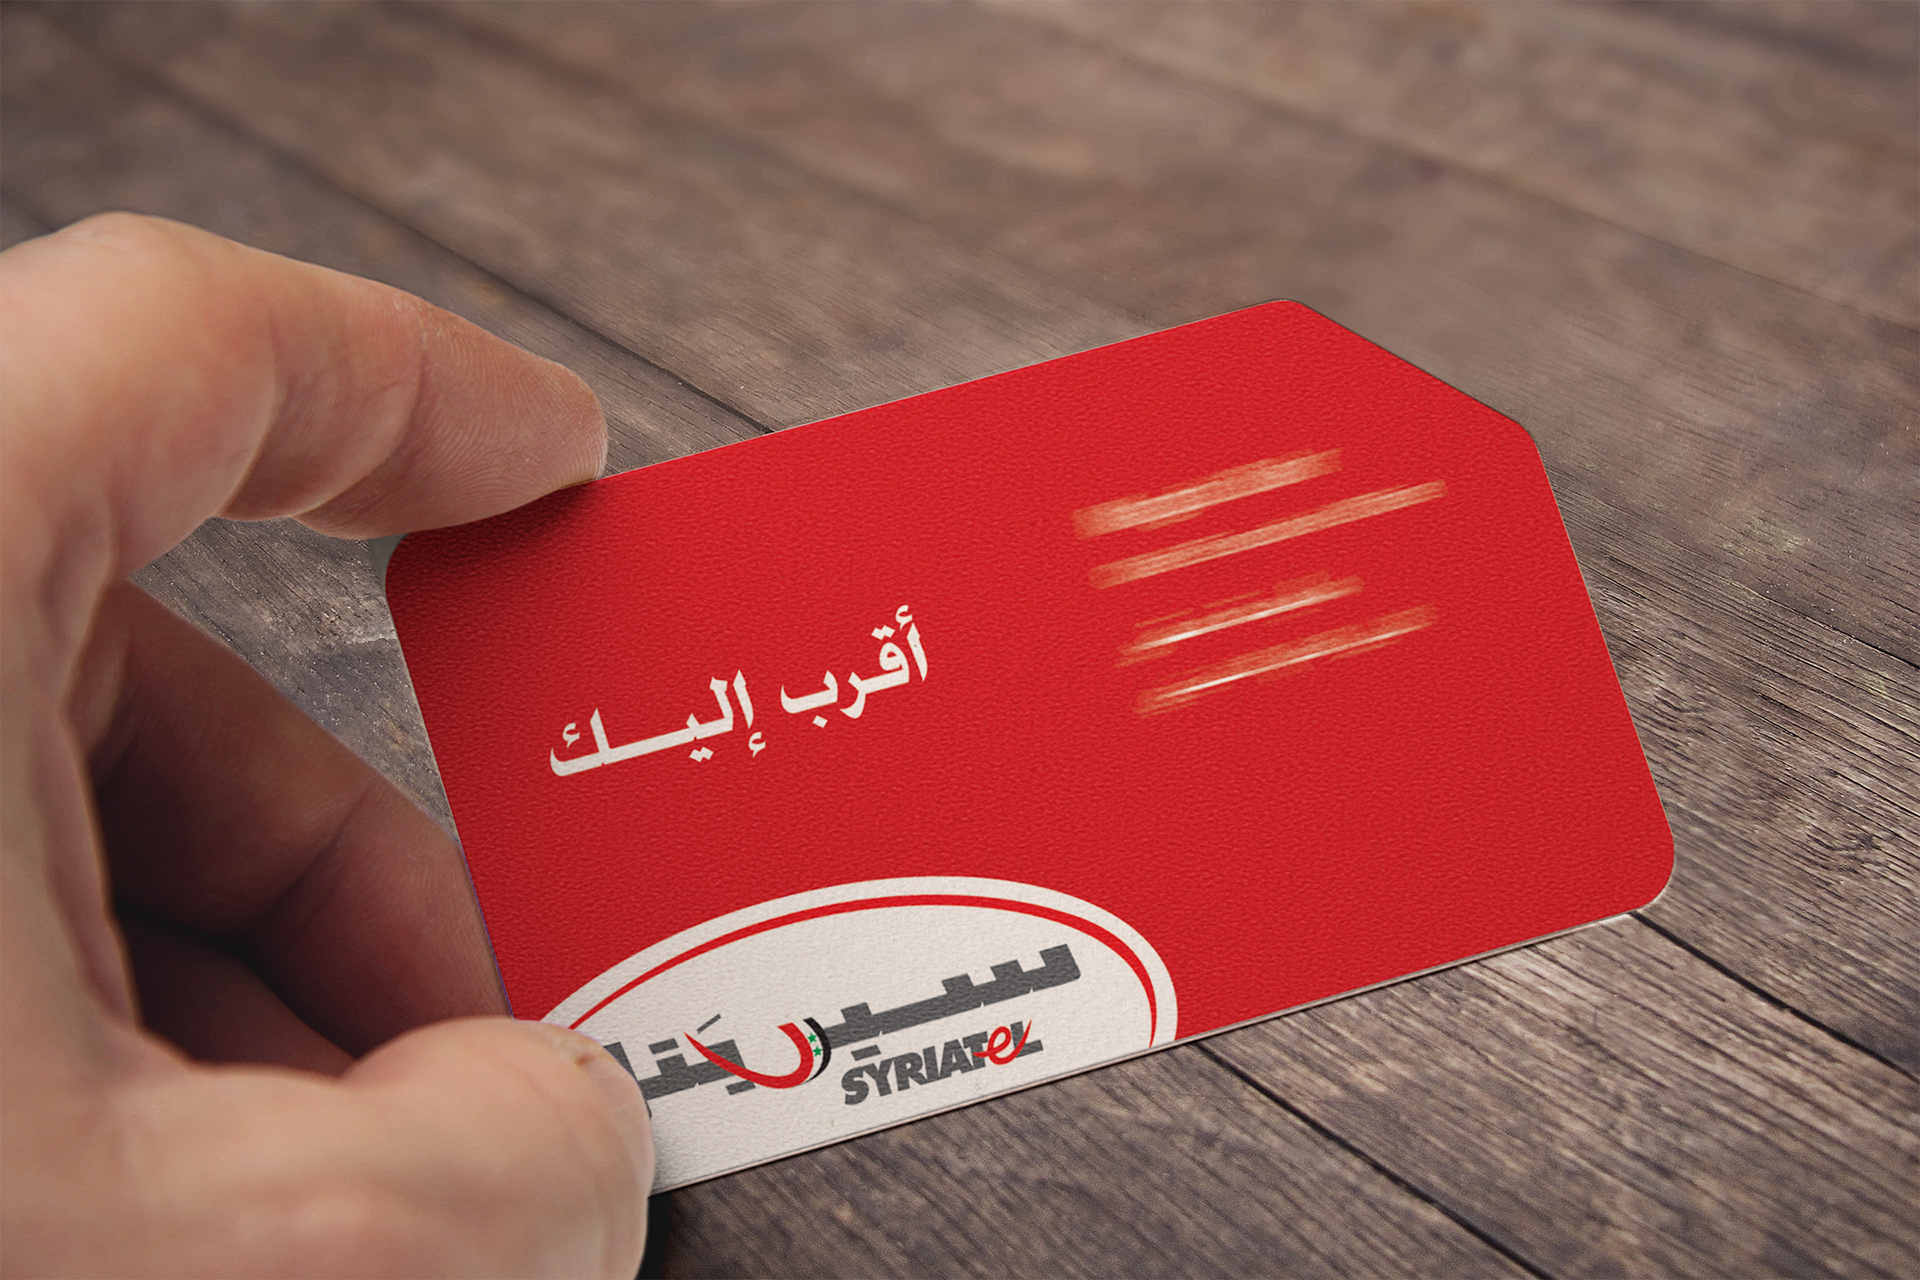

##  Overview
This project focuses on analyzing customer churn using classification models. The goal of this project is to provide valuable insights to SyriaTel, a telecommunications company regarding factors that influence the rate at which customers stop doing business with the company over a given period of time and to make data-driven recommendations on how to reduce the amount of money lost because of customers who don't stick around very long.

## Project Goal
The primary goal of this project is to perform a comprehensive analysis of the SyriaTel customer churn data, using classification models. This analysis aims to provide valuable insights into the factors that influence customer churn and make data-driven recommendations for the telecom business  and other stakeholders.

## Stakeholders
The intended audience for this project includes:
1. Shareholders: Individuals looking to enhance the value of their investments through informed decision-making regarding long-term growth and sustainability.

2. Management: Company leaders and agents seeking data-driven insights to ensure their clients stay in business with them in the long run. 

3. Marketing team: Professionals in this department seek to maintain increased customer acquisition, engagement, and delivery of tailored promotions.

4. Customer Support Team: The customer care team works to resolve issues quickly and effectively while also raising customer satisfaction levels.

5. Customers: These are the final consumers who demand trustworthy and reasonably priced telecommunications services.

## Key Questions
1. Which plans are customers satisfied with?
2. Which factors lead to service discontinuation?
3. How can SyraTel retain customers?

## 1. Business Understanding
Syriatel is a mobile network provider in Syria. It is a publicly traded telecommunications company founded in 2000 and headquartered in Damascus. The company operates a standard 2G GSM service over 900 MHz along with 1800 MHz in dense urban areas, and 3G UMTS HSPA+ over B1 (2100 MHz). It is one of the only two providers in Syria, the other being MTN Syria. In 2022 the Syrian telecommunications authority awarded the third telecom license to Wafa Telecom which offers LTE with 150 Mb/s speeds, under the brand name Super Surf.

## 2. Data Understanding
We used data sourced from SyriaTel Customer Churn Dataset CSV. The data represents customers with information on different variables. Total data used was from 3333 customers. The dataset has a target variable that indicates whether a customer has churned (1 for "yes" and 0 for "no"). Key variables in oour dataset include: International plan(yes/no), Voicemail plan(yes/no), Number of calls, Number of service calls and Daily charge.

Properties of variables of interest:

1. State(Categorical): This is the state in which a customer lives.
2. Account length(Numerical): The number of days the customer has been with the company.
3. Area Code (Categorical): The area code associated with the customer's phone number.
4. Phone Number (Categorical): The customer's phone number, typically treated as an identifier.
5. International Plan (Categorical): Whether the customer has an international calling plan (e.g., "yes" or "no").
6. Voice Mail Plan (Categorical): Whether the customer has a voicemail plan (e.g., "yes" or "no").
7. Number of Voicemail Messages (Numerical): The number of voicemail messages received by the customer.
8. Total Day Minutes (Numerical): The total number of minutes the customer used during the daytime.
9. Total Day Calls (Numerical): The total number of calls made by the customer during the daytime.
10. Total Day Charge (Numerical): The total charges incurred for daytime usage.
11. Total Evening Minutes (Numerical): The total number of minutes the customer used in the evening.
12. Total Evening Calls (Numerical): The total number of calls made by the customer in the evening.
13. Total Evening Charge (Numerical): The total charges incurred for evening usage.
14. Total Night Minutes (Numerical): The total number of minutes the customer used at night.
15. Total Night Calls (Numerical): The total number of calls made by the customer at night.
16. Total Night Charge (Numerical): The total charges incurred for nighttime usage.
17. Total International Minutes (Numerical): The total number of international minutes used by the customer.
18. Total International Calls (Numerical): The total number of international calls made by the customer.
19. Total International Charge (discrete - Numerical): The total charges incurred for international calls.
20. Customer Service Calls (discrete - Numerical): The number of customer service calls made by the customer.
21. Churn: if the customer has churned (1=yes; 0 = no)

## 3. Data Preparation

### 3.1 Exploratory Data Analysis

In [1]:
# Importing the relevant libraries for data processing
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset into a dataframe
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [3]:
# Exploring the structure and content of the DataFrame
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [4]:
# Checking the shape of the dataset
df.shape

(3333, 21)

In [5]:
print(f'This data set has {len(df.columns)} columns listed below:\n')

for i, col in enumerate(df.columns):
    print(f'{i+1}: {col}')

This data set has 21 columns listed below:

1: state
2: account length
3: area code
4: phone number
5: international plan
6: voice mail plan
7: number vmail messages
8: total day minutes
9: total day calls
10: total day charge
11: total eve minutes
12: total eve calls
13: total eve charge
14: total night minutes
15: total night calls
16: total night charge
17: total intl minutes
18: total intl calls
19: total intl charge
20: customer service calls
21: churn


In [6]:
# Looking at the info printout
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The column 'area code' is represented as an **int64** data type yet we described it as a categorical variable. Most categorical values are mostly **strings** therefore we need to convert it because of it's categorical nature.

In [7]:
# Converting area code into string
df['area code'] = df['area code'].astype(str)

In [8]:
# Confirming the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
# Checking for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
# Checking for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [11]:
# Checking for duplicated rows
duplicate_rows = df[df.duplicated()]
num_duplicate_rows = len(duplicate_rows)

print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0


### 3.2 Summary statistics

In [12]:
# Summary statistics of the dataframe
df.describe()

account length  number vmail messages  total day minutes  \
count     3333.000000            3333.000000        3333.000000   
mean       101.064806               8.099010         179.775098   
std         39.822106              13.688365          54.467389   
min          1.000000               0.000000           0.000000   
25%         74.000000               0.000000         143.700000   
50%        101.000000               0.000000         179.400000   
75%        127.000000              20.000000         216.400000   
max        243.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [13]:
# Counting the number of churned and non-churned customers
churned_count = df['churn'].sum()
not_churned_count = len(df) - churned_count

# Calculating the percentage of churned and non-churned customers
churned_percentage = (churned_count / len(df)) * 100
not_churned_percentage = (not_churned_count / len(df)) * 100

print(f"Number of churned customers: {churned_count} ({churned_percentage:.2f}%)")
print(f"Number of non-churned customers: {not_churned_count} ({not_churned_percentage:.2f}%)")

# Checking for class imbalance
if churned_percentage > 70 or not_churned_percentage > 70:
    print("The dataset is imbalanced.")
else:
    print("The dataset is not highly imbalanced.")

Number of churned customers: 483 (14.49%)
Number of non-churned customers: 2850 (85.51%)
The dataset is imbalanced.


### 3.3 Univariate analysis

In [14]:
# Diving the data into numerical and categorical varialbles 
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = df.select_dtypes(include=['object', 'bool']).columns
numerical_vars, categorical_vars

(Index(['account length', 'number vmail messages', 'total day minutes',
        'total day calls', 'total day charge', 'total eve minutes',
        'total eve calls', 'total eve charge', 'total night minutes',
        'total night calls', 'total night charge', 'total intl minutes',
        'total intl calls', 'total intl charge', 'customer service calls'],
       dtype='object'),
 Index(['state', 'area code', 'phone number', 'international plan',
        'voice mail plan', 'churn'],
       dtype='object'))

### Categorical variables analysis

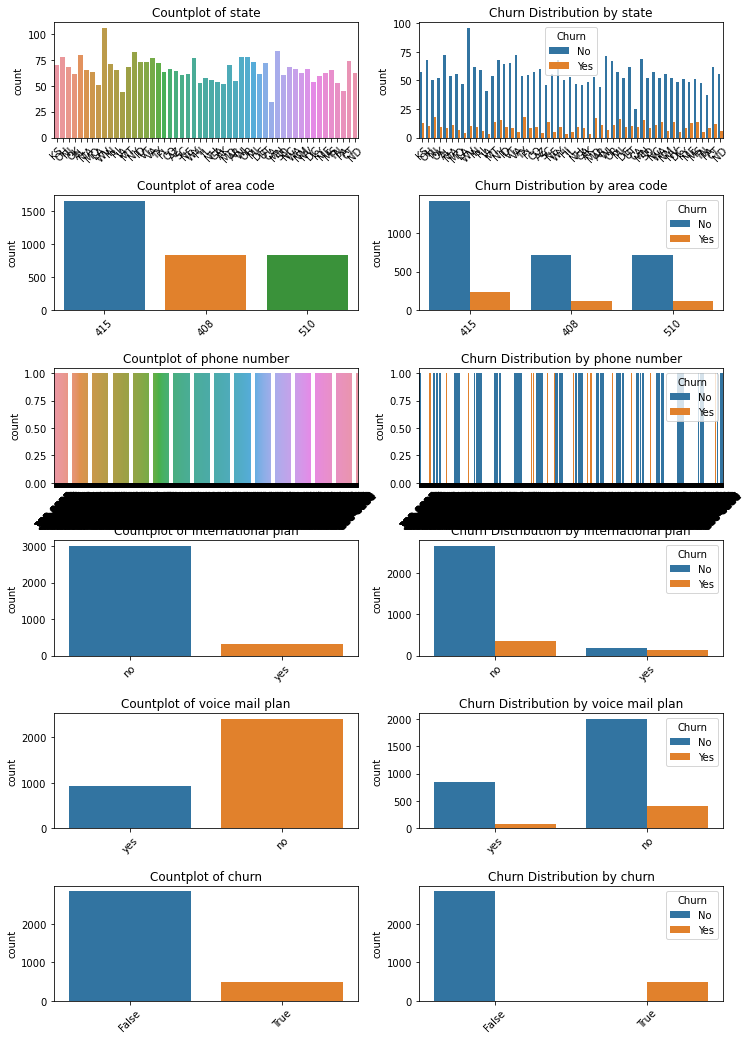

In [15]:
# Defining the categorical variables
categorical_vars = ['state', 'area code', 'phone number', 'international plan', 'voice mail plan', 'churn']

# Setting up subplots for categorical variable visualizations
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=2, figsize=(12, 18))
fig.subplots_adjust(hspace=0.5)

# Creating bar plots for each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, ax=axes[i, 0])
    axes[i, 0].set_title(f'Countplot of {var}')
    axes[i, 0].set_xlabel('')
    
    sns.countplot(data=df, x=var, hue='churn', ax=axes[i, 1])
    axes[i, 1].set_title(f'Churn Distribution by {var}')
    axes[i, 1].set_xlabel('')
    axes[i, 1].legend(title='Churn', labels=['No', 'Yes'])

# Rotating x-axis labels for better visibility
for ax in axes:
    for subplot in ax:
        subplot.tick_params(axis='x', rotation=45)

plt.show()

In [16]:
print("Value counts for the categorical variables:\n")
for var in categorical_vars:
    print(f'{var}: {len(df[var].value_counts())}')

Value counts for the categorical variables:

state: 51
area code: 3
phone number: 3333
international plan: 2
voice mail plan: 2
churn: 2


1. There are 51 states present in our data-set with 3 different area codes.
2. Each record is represented by a unique phone number.
3. A customer can either have been subscribed to a voice mail plan or not.
4. A customer can also either have been subscribed to international plan or not.

### Numerical variables analysis

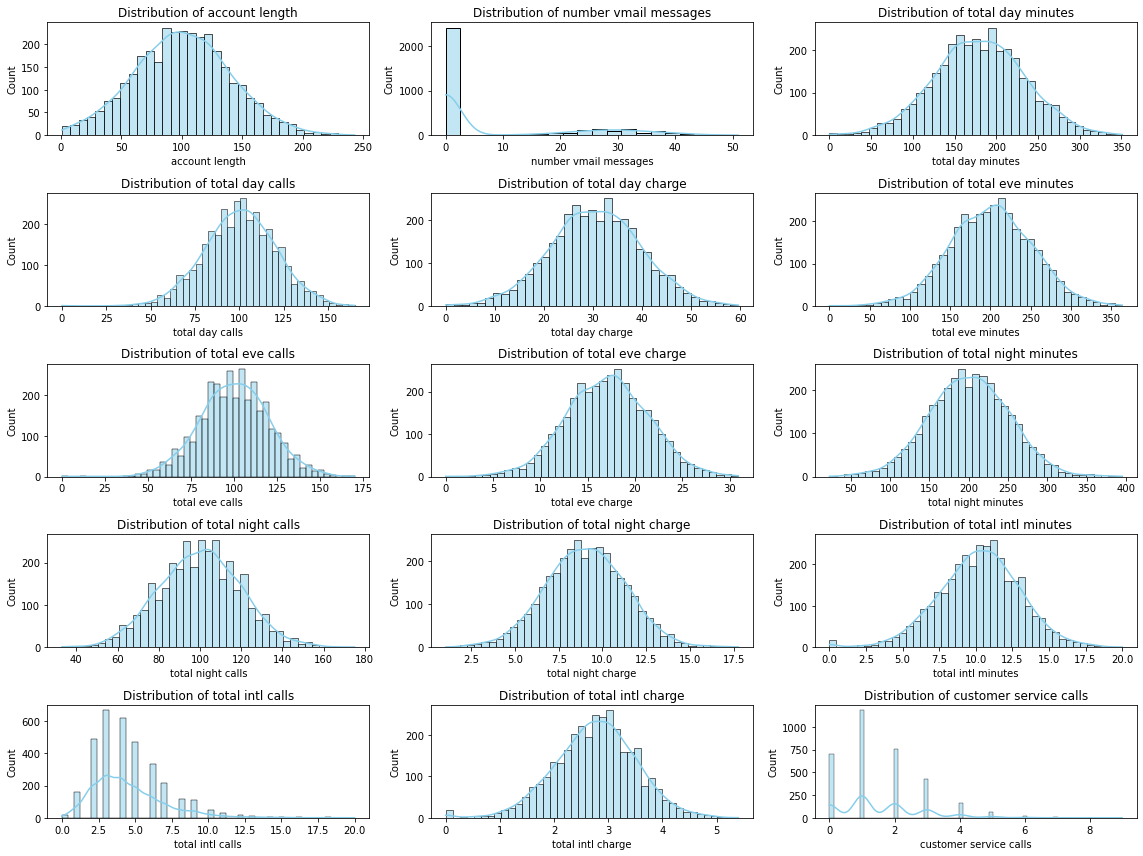

In [17]:
# Selecting the numeric variables
numeric_vars = ['account length', 'number vmail messages', 'total day minutes',
                'total day calls', 'total day charge', 'total eve minutes',
                'total eve calls', 'total eve charge', 'total night minutes',
                'total night calls', 'total night charge', 'total intl minutes',
                'total intl calls', 'total intl charge', 'customer service calls']

# Setting up subplots for multiple visualizations
plt.figure(figsize=(16, 12))

# Creating histograms for numeric variables
for i, col in enumerate(numeric_vars, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')

# Adding spacing between subplots
plt.tight_layout()
plt.show()

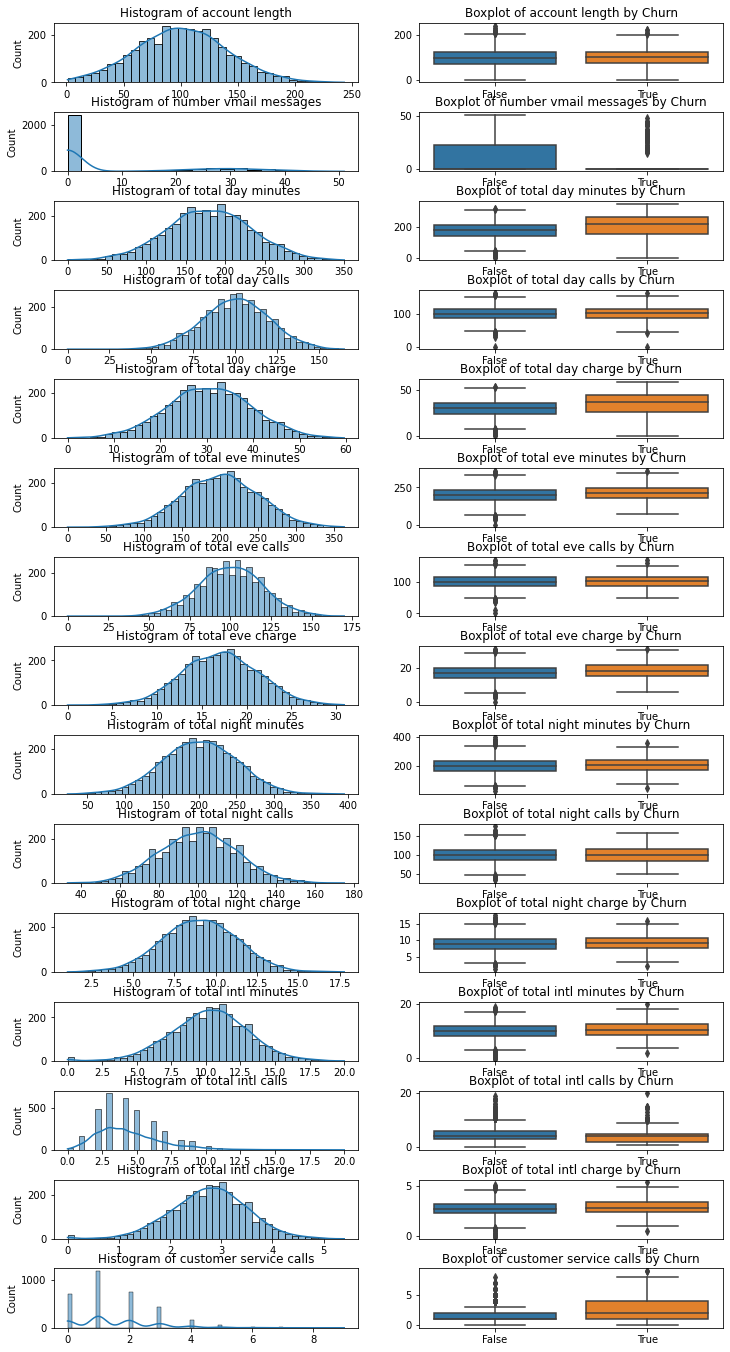

In [18]:
# Defining the numeric variables
numeric_vars = ['account length', 'number vmail messages', 'total day minutes',
                'total day calls', 'total day charge', 'total eve minutes',
                'total eve calls', 'total eve charge', 'total night minutes',
                'total night calls', 'total night charge', 'total intl minutes',
                'total intl calls', 'total intl charge', 'customer service calls']

# Setting up subplots for numeric variable visualizations
fig, axes = plt.subplots(nrows=len(numeric_vars), ncols=2, figsize=(12, 24))
fig.subplots_adjust(hspace=0.5)

# Creating histograms for each numeric variable
for i, var in enumerate(numeric_vars):
    sns.histplot(df[var], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {var}')
    axes[i, 0].set_xlabel('')
    
    sns.boxplot(data=df, y=var, x='churn', ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {var} by Churn')
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')
    
# Rotating x-axis labels for better visibility
for ax in axes:
    for subplot in ax:
        subplot.tick_params(axis='x', rotation=0)

plt.show()

The numerical variables are continuous in nature, except customer service calls, and total intl calls which are discrete. Most of them are normally distributed while some, like customer service calls, total intl calls, number of voice mails are positively skewed.

### Skewness and Kurtosis
We shall calculate skewness and kurtosis for the numeric variables to check if any variables exhibited significant non-normal distribution.

In [19]:
from scipy.stats import skew, kurtosis

numeric_vars = ['account length', 'number vmail messages', 'total day minutes',
                'total day calls', 'total day charge', 'total eve minutes',
                'total eve calls', 'total eve charge', 'total night minutes',
                'total night calls', 'total night charge', 'total intl minutes',
                'total intl calls', 'total intl charge', 'customer service calls']

for col in numeric_vars:
    skewness = skew(df[col])
    kurt = kurtosis(df[col])
    print(f'Column: {col}')
    print(f'Skewness: {skewness}')
    print(f'Kurtosis: {kurt}')
    if abs(skewness) > 1:
        print('Skewness is significant (non-normal distribution)')
    if abs(kurt) > 3:
        print('Kurtosis is significant (non-normal distribution)')
    print('---')

Column: account length
Skewness: 0.09656281161489656
Kurtosis: -0.10947391843415755
---
Column: number vmail messages
Skewness: 1.2642543349768245
Kurtosis: -0.05285151059052451
Skewness is significant (non-normal distribution)
---
Column: total day minutes
Skewness: -0.029063979518119797
Kurtosis: -0.021710117924088834
---
Column: total day calls
Skewness: -0.11173632373075189
Kurtosis: 0.24101722895174227
---
Column: total day charge
Skewness: -0.02907017792703775
Kurtosis: -0.021581719145033595
---
Column: total eve minutes
Skewness: -0.023866708804637538
Kurtosis: 0.0237916804447047
---
Column: total eve calls
Skewness: -0.05553813000161922
Kurtosis: 0.20404769217448226
---
Column: total eve charge
Skewness: -0.023847250496276968
Kurtosis: 0.02364954586272594
---
Column: total night minutes
Skewness: 0.008917275580987895
Kurtosis: 0.08388775499253365
---
Column: total night calls
Skewness: 0.03248494205404463
Kurtosis: -0.07371122421258836
---
Column: total night charge
Skewness: 0

1. Number of voice mail messages has a positive skewness value greater than 1. It has a right-skewed distribution therefore it is skewed towards higher values, with the majority of customers receiving a small number of voice mail messages and a few customers receiving a disproportionately large number of messages.
2. The number of international calls has a high positive kurtosis value of more than 3 and a right skewed distribution. It contains outliers with extreme values with the majority of consumers placing very few calls internationally.
3. Customer service calls also has a positive kurtosis value greater than 1 and a right skewed distribution, indicating the existence of outliers and the fact that while most customers place a small number of service calls, a small number of them place more service calls. 

### Multicollinearity
Filtering out highly correlated variables is a common practice in data analysis and machine learning to reduce multicollinearity and simplify models. In this case, there are highly correlated variables in the dataset. Let us identify these variables and explore their relationships further.

In [20]:
correlation_matrix = df.corr()

correlation_threshold = 0.7 # threshhold

highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # Getting the correlation coefficient
        correlation = correlation_matrix.iloc[i, j]
        
        # Checking if the correlation is above the threshold
        if abs(correlation) > correlation_threshold:
            # Get the variable names
            variable1 = correlation_matrix.columns[i]
            variable2 = correlation_matrix.columns[j]
            
            # Appending the pair and correlation to the list
            highly_correlated_pairs.append((variable1, variable2, correlation))

highly_correlated_pairs

[('total day charge', 'total day minutes', 0.999999952190397),
 ('total eve charge', 'total eve minutes', 0.9999997760198517),
 ('total night charge', 'total night minutes', 0.99999921487588),
 ('total intl charge', 'total intl minutes', 0.9999927417510258)]

We shall then create a mask to filter out highly correlated variables and focus on the ones that have a significant correlation. Let us set a threshold of 0.7 and only display variables with correlations above this threshold.

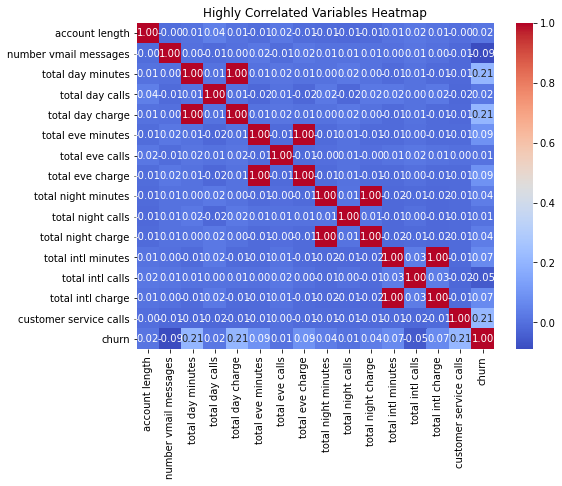

In [21]:
# Setting the threshold for correlation
correlation_threshold = 0.7

# Creating a mask to filter out highly correlated variables
correlation_mask = correlation_matrix.abs() > correlation_threshold

# Getting the names of highly correlated columns
highly_correlated_columns = correlation_mask.any()

# Subseting the correlation matrix and numeric_vars based on the mask
filtered_correlation_matrix = correlation_matrix.loc[highly_correlated_columns, highly_correlated_columns]

# Setting up the figure size
plt.figure(figsize=(8, 6))

# Creating a heatmap to visualize correlations of highly correlated variables
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Highly Correlated Variables Heatmap')

plt.show()

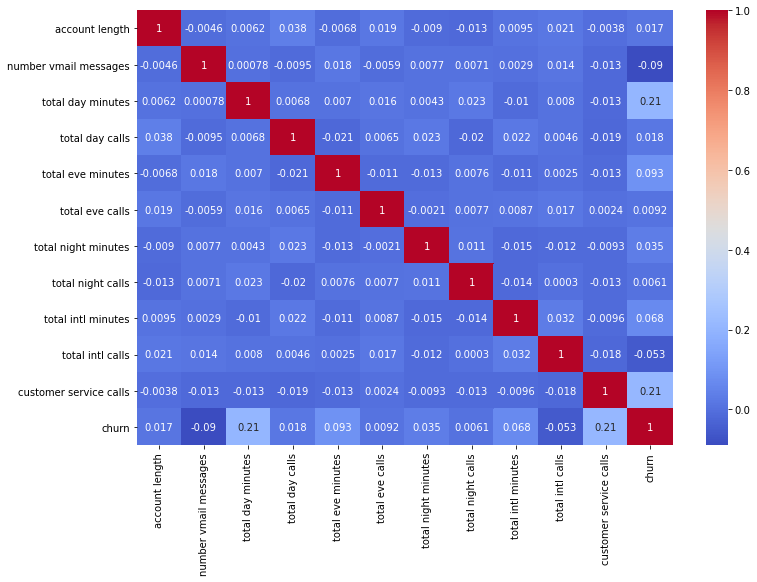

In [22]:
# Dropping the highly correlated columns
df = df.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])

# Confirming if the multicollinearity is gone
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [23]:
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # Getting the correlation coefficient
        correlation = correlation_matrix.iloc[i, j]
        
        # Checking if the correlation is above the threshold
        if abs(correlation) > correlation_threshold:
            # Get the variable names
            variable1 = correlation_matrix.columns[i]
            variable2 = correlation_matrix.columns[j]
            
            # Appending the pair and correlation to the list
            highly_correlated_pairs.append((variable1, variable2, correlation))

highly_correlated_pairs or "No more columns with a correlation of more than 0.7"

'No more columns with a correlation of more than 0.7'

### 3.4 Bivariate anaysis
Bivariate analysis examines the relationship between two variables, to help understand how they interact or correlate with each other. We can perform bivariate analysis to explore how various factors in the SyriaTel customer churn data relate to customer churn.

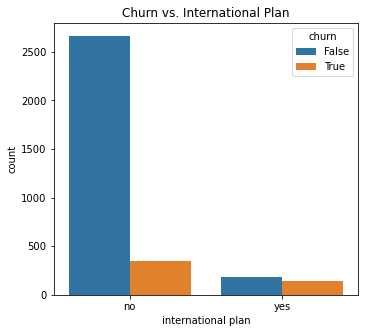

In [24]:
# Churn vs. International Plan
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="international plan", hue="churn")
plt.title("Churn vs. International Plan")

plt.show()

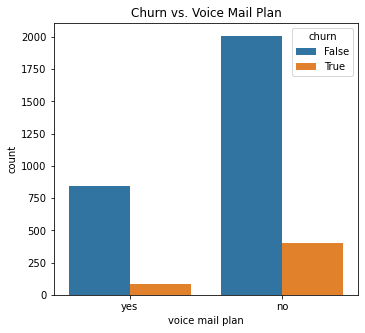

In [25]:
# Churn vs. Voice Mail Plan
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="voice mail plan", hue="churn")
plt.title("Churn vs. Voice Mail Plan")

plt.show()

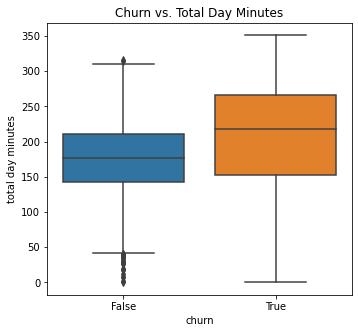

In [26]:
# Churn vs. Total Day Minutes
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="churn", y="total day minutes")
plt.title("Churn vs. Total Day Minutes")

plt.show()

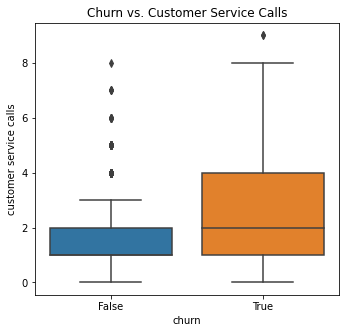

In [27]:
# Churn vs. Customer Service Calls
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="churn", y="customer service calls")
plt.title("Churn vs. Customer Service Calls")

plt.show()

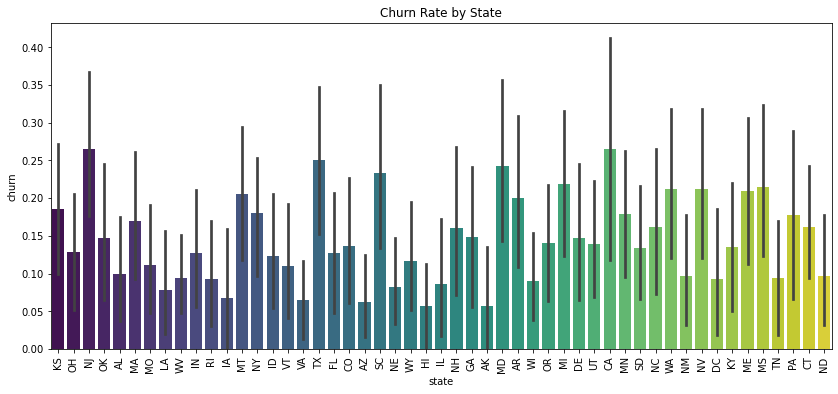

In [28]:
# Churn Rate by State
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x="state", y="churn", palette="viridis")
plt.xticks(rotation=90)
plt.title("Churn Rate by State")
plt.show()

### 3.5 One-Hot Encoding
We are going to convert categorical data to numeric format through one-hot encoding. We have 5 categoricall variables in our dataset excluding the target variable. We will exclude the the 'phone number' column from our analysis by dropping it because it lacks practical usefuleness for modeling.

In [29]:
# Dropping the phone number column
df = df.drop(columns=['phone number'])

In [30]:
# Extracting the categorical columns
categorical_columns = ['state', 'area code', 'international plan', 'voice mail plan']

# Using pd.get_dummies to one-hot encode these columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# The 'drop_first=True' argument will drop one of the binary columns for each categorical variable
# to avoid multicollinearity. If you want to keep all binary columns, you can omit this argument.

# Now, 'df_encoded' contains the original numeric columns and the one-hot encoded columns.
# Checking the first few rows to see the result
df_encoded.head()

account length  number vmail messages  total day minutes  total day calls  \
0             128                     25              265.1              110   
1             107                     26              161.6              123   
2             137                      0              243.4              114   
3              84                      0              299.4               71   
4              75                      0              166.7              113   

   total eve minutes  total eve calls  total night minutes  total night calls  \
0              197.4               99                244.7                 91   
1              195.5              103                254.4                103   
2              121.2              110                162.6                104   
3               61.9               88                196.9                 89   
4              148.3              122                186.9                121   

   total intl minutes  total intl calls  ...  state_VA  state_VT  state_WA  \
0                10.0                 3  ...         0         0         0   
1                13.7                 3  ...         0         0         0   
2                12.2                 5  ...         0         0         0   
3                 6.6                 7  ...         0         0         0   
4                10.1                 3  ...         0         0         0   

   state_WI  state_WV  state_WY  area code_415  area code_510  \
0         0         0         0              1              0   
1         0         0         0              1              0   
2         0         0         0              1              0   
3         0         0         0              0              0   
4         0         0         0              1              0   

   international plan_yes  voice mail plan_yes  
0                       0                    1  
1                       0                    1  
2                       0                    0  
3                       1                    0  
4                       1                    0  

[5 rows x 66 columns]

## 4. Modeling

In [123]:
# Importing the relevant libraries for modelling
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, \
roc_curve, auc, ConfusionMatrixDisplay,accuracy_score

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

### 4.1 SMOTE
As we saw earlier, our dataset is imbalanced. We are going to use SMOTE to deal with the imbalances in the data.

In [124]:
# Defining X (features) and y (target)
# Target variable
X = df_encoded.drop(columns='churn')

# Features
y = df_encoded['churn']

In [125]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the resulting sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2666, 65), (667, 65), (2666,), (667,))

In [126]:
# Creating an instance of SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Applying SMOTE to the data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [127]:
# Checking the class distribution
y_train_resampled.value_counts()

True     2284
False    2284
Name: churn, dtype: int64

### 4.2 Baseline Model

Accuracy of the Dummy Classifier: 0.85


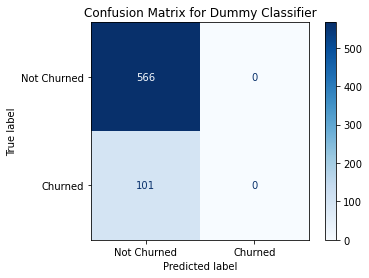

In [128]:
# Creating a Dummy Classifier for the baseline model
dummy_classifier = DummyClassifier(strategy='most_frequent', random_state=42)

# Fitting the dummy classifier to the resampled data
dummy_classifier.fit(X_train_resampled, y_train_resampled)

# Predicting on the test set
dummy_preds = dummy_classifier.predict(X_test)

# Calculating and printing the accuracy of the dummy classifier
dummy_accuracy = accuracy_score(y_test, dummy_preds)
print(f"Accuracy of the Dummy Classifier: {dummy_accuracy:.2f}")

# Generating the confusion matrix for the dummy classifier
dummy_confusion_matrix = confusion_matrix(y_test, dummy_preds)

# Displaying the confusion matrix
ConfusionMatrixDisplay(dummy_confusion_matrix, display_labels=['Not Churned', 'Churned']).plot(cmap='Blues')
plt.title('Confusion Matrix for Dummy Classifier')
plt.show()

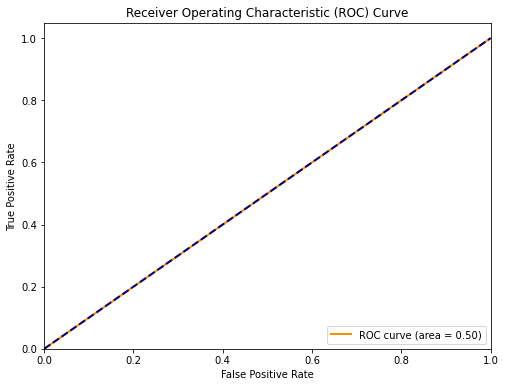

In [129]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have 'baseline_preds' containing the predicted probabilities (scores)
# of the positive class (e.g., 1 for churned, 0 for not churned) from your baseline model.
# You should also have 'y_test' containing the true labels (0 or 1).

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dummy_preds)

# Calculating the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 4.3 Logistic Regression Model

Accuracy of the Logistic Regression Model: 0.84


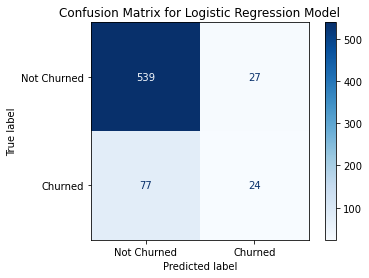

Classification Report for Logistic Regression Model:
               precision    recall  f1-score   support

       False       0.88      0.95      0.91       566
        True       0.47      0.24      0.32       101

    accuracy                           0.84       667
   macro avg       0.67      0.59      0.61       667
weighted avg       0.81      0.84      0.82       667



In [131]:
# Creating a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Creating a pipeline to standardize the data and train the model
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', logistic_model)
])

# Training the Logistic Regression model on the resampled data
model_pipeline.fit(X_train_resampled, y_train_resampled)

# Predicting on the test set
logistic_preds = model_pipeline.predict(X_test)

# Calculating and printing the accuracy of the Logistic Regression model
logistic_accuracy = accuracy_score(y_test, logistic_preds)
print(f"Accuracy of the Logistic Regression Model: {logistic_accuracy:.2f}")

# Generating the confusion matrix for the Logistic Regression model
logistic_confusion_matrix = confusion_matrix(y_test, logistic_preds)

# Displaying the confusion matrix
ConfusionMatrixDisplay(logistic_confusion_matrix, display_labels=['Not Churned', 'Churned']).plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Generating the classification report
classification_rep = classification_report(y_test, logistic_preds)
print("Classification Report for Logistic Regression Model:\n", classification_rep)

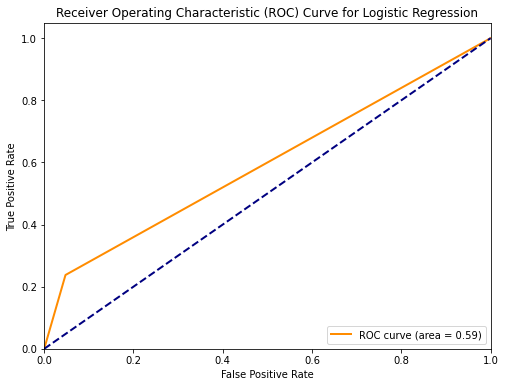

In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_preds)

# Calculating the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

Overally, this is a great model given the metrics above, and shows a significant improvement in the metrics from the base model. There is also no sign of overfitting, now we need to use other different models before deciding the final.

### 4.4 Decision Tree Classifier

Accuracy of the Decision Tree Classifier: 0.82


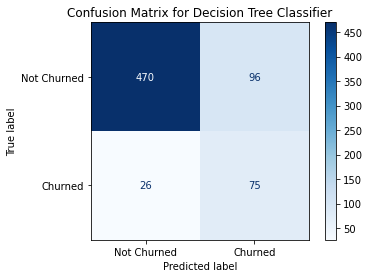

Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

       False       0.95      0.83      0.89       566
        True       0.44      0.74      0.55       101

    accuracy                           0.82       667
   macro avg       0.69      0.79      0.72       667
weighted avg       0.87      0.82      0.83       667



In [133]:
from sklearn.tree import DecisionTreeClassifier

# Creating a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Creating a pipeline to standardize the data (if necessary) and train the Decision Tree model
decision_tree_pipeline = Pipeline([
    # You can add a scaler here if you need to standardize your features
    ('decision_tree', decision_tree_model)
])

# Training the Decision Tree model on the resampled data
decision_tree_pipeline.fit(X_train_resampled, y_train_resampled)

# Predicting on the test set
decision_tree_preds = decision_tree_pipeline.predict(X_test)

# Calculating and printing the accuracy of the Decision Tree model
decision_tree_accuracy = accuracy_score(y_test, decision_tree_preds)
print(f"Accuracy of the Decision Tree Classifier: {decision_tree_accuracy:.2f}")

# Generating the confusion matrix for the Decision Tree model
decision_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_preds)

# Displaying the confusion matrix
ConfusionMatrixDisplay(decision_tree_confusion_matrix, display_labels=['Not Churned', 'Churned']).plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Generating the classification report
decision_tree_classification_rep = classification_report(y_test, decision_tree_preds)
print("Classification Report for Decision Tree Classifier:\n", decision_tree_classification_rep)

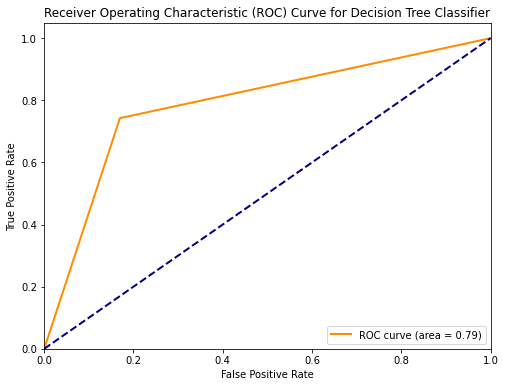

In [134]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have 'decision_tree_preds' containing the predicted probabilities from your decision tree classifier.
# You should also have 'y_test' containing the true labels (0 or 1).

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_tree_preds)

# Calculating the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Creating the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Defining a parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],  # You can specify different values for max_depth
    'min_samples_split': [2, 5, 10]  # You can specify different values for min_samples_split
}

# Creating a grid search with cross-validation
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fitting the grid search to your data
grid_search.fit(X_train, y_train)

# Getting the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_decision_tree = grid_search.best_estimator_

# Evaluating the best model on your test data
y_pred = best_decision_tree.predict(X_test)

# We can also create an ROC curve and calculate the AUC for the best model
fpr, tpr, thresholds = roc_curve(y_test, best_decision_tree.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print("Best Decision Tree AUC:", roc_auc)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10}
Best Decision Tree AUC: 0.8619196725326242


### 4.5 Random Forest Classifier

Accuracy of the Random Forest Classifier: 0.91


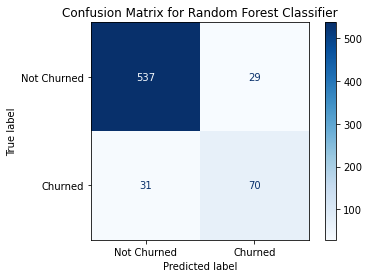

Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

       False       0.95      0.95      0.95       566
        True       0.71      0.69      0.70       101

    accuracy                           0.91       667
   macro avg       0.83      0.82      0.82       667
weighted avg       0.91      0.91      0.91       667



In [137]:
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Creating a pipeline to standardize the data (if necessary) and train the Random Forest model
random_forest_pipeline = Pipeline([
    # You can add a scaler here if you need to standardize your features
    ('random_forest', random_forest_model)
])

# Training the Random Forest model on the resampled data
random_forest_pipeline.fit(X_train_resampled, y_train_resampled)

# Predicting on the test set
random_forest_preds = random_forest_pipeline.predict(X_test)

# Calculating and printing the accuracy of the Random Forest model
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)
print(f"Accuracy of the Random Forest Classifier: {random_forest_accuracy:.2f}")

# Generating the confusion matrix for the Random Forest model
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_preds)

# Displaying the confusion matrix
ConfusionMatrixDisplay(random_forest_confusion_matrix, display_labels=['Not Churned', 'Churned']).plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Generating the classification report
random_forest_classification_rep = classification_report(y_test, random_forest_preds)
print("Classification Report for Random Forest Classifier:\n", random_forest_classification_rep)

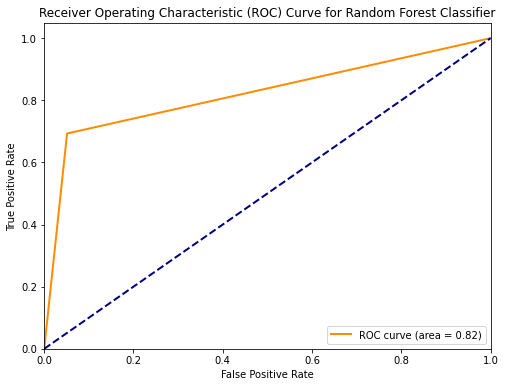

In [138]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have 'random_forest_preds' containing the predicted probabilities from your random forest classifier.
# You should also have 'y_test' containing the true labels (0 or 1).

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, random_forest_preds)

# Calculating the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

In [139]:
score = random_forest_model.score(X_test, y_test)
train_score = accuracy_score(y_true=y_train_resampled, 
                             y_pred=random_forest_model.predict(X_train_resampled))
print("Model Accuracy on Test Data: {:.2f}%".format(score * 100))
print("Model Accuracy on Train Data: {:.2f}%".format(train_score * 100))

Model Accuracy on Test Data: 91.00%
Model Accuracy on Train Data: 100.00%


In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Creating the Random Forest model
random_forest = RandomForestClassifier()

# Defining a parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # You can specify different values for the number of trees
    'max_depth': [None, 10, 20, 30],  # You can specify different values for max_depth
    'min_samples_split': [2, 5, 10]  # You can specify different values for min_samples_split
}

# Creating a grid search with cross-validation
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fitting the grid search to your data
grid_search.fit(X_train, y_train)

# Getting the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_random_forest = grid_search.best_estimator_

# Evaluating the best model on your test data
y_pred = best_random_forest.predict(X_test)

# We can also create an ROC curve and calculate the AUC for the best model
fpr, tpr, thresholds = roc_curve(y_test, best_random_forest.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print("Best Random Forest AUC:", roc_auc)

Best Hyperparameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest AUC: 0.9369118007207081


We are going to create a class that will use cross-validation to evaluate different base models and select the best one based on a specified evaluation metric. We will use the AUC score as the evaluation metric, but it can be modified for other metrics like accuracy and F1-score.

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

class ModelSelector:
    def __init__(self, models, X, y, scoring='roc_auc', cv=5):
        self.models = models
        self.X = X
        self.y = y
        self.scoring = scoring
        self.cv = cv
        self.best_model = None
        self.best_score = None

    def fit(self):
        best_score = 0
        best_model = None

        # Useing stratified k-fold cross-validation
        kf = StratifiedKFold(n_splits=self.cv, shuffle=True, random_state=42)

        for model_name, model in self.models.items():
            scores = cross_val_score(model, self.X, self.y, cv=kf, scoring=self.scoring)

            # Calculating the mean score
            mean_score = scores.mean()
            
            if mean_score > best_score:
                best_score = mean_score
                best_model = model_name

        self.best_model = best_model
        self.best_score = best_score

    def get_best_model(self):
        return self.best_model

    def get_best_score(self):
        return self.best_score

Here's how we are going to use this class:

1. Instantiate the ModelSelector class with a dictionary of base models, your data X and y, and the evaluation metric you want to use.
2. Call the fit method to evaluate and select the best model.
3. Retrieve the best model and its score using the get_best_model and get_best_score methods.

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Defining the base models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier': XGBClassifier()
}

# Instantiating the ModelSelector
model_selector = ModelSelector(models, X_train, y_train)

# Fitting the models and select the best one
model_selector.fit()

# Getting the best model and its score
best_model = model_selector.get_best_model()
best_score = model_selector.get_best_score()

print("Best Model:", best_model)
print("Best Score (AUC):", best_score)

Best Model: XGBClassifier
Best Score (AUC): 0.9095239466280581


### 4.6 XGBClassifier
The Extreme Gradient Boosting performs the best without any form of parameter tuning, in accuracy and AUC. So we train it and tune it.

In [143]:
# Instantiating the XGBClassifier
clf = XGBClassifier()
# Fit XGBClassifier
clf.fit(X_train_resampled, y_train_resampled)

# Predicting on training and test sets
training_preds = clf.predict(X_train_resampled)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train_resampled, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 99.5%
Validation accuracy: 94.75%


In [144]:
# Tuning parameters
xgb_param_grid = {
    'learning_rate': [0.05, 0.1], 
    'max_depth': [3, 4, 5], 
    'min_child_weight': [1, 2, 3], 
    'subsample': [0.7, 0.8, 0.9],
    'n_estimators': [100],
}

In [145]:
# Consume the parameter grid in the GridSearchCV class
grid_clf = GridSearchCV(clf, xgb_param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train_resampled, y_train_resampled)

# Get the best parameters 
best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_resampled)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train_resampled, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 5
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 94.92%
Validation accuracy: 92.95%


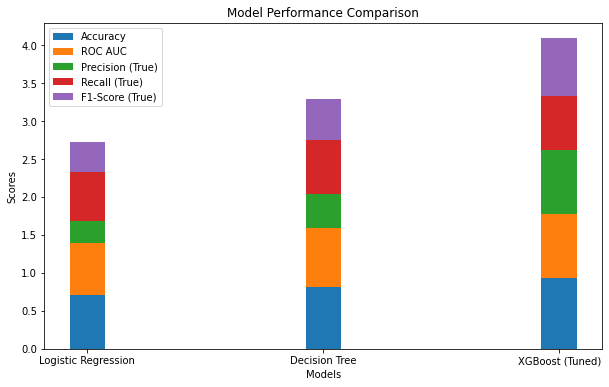

In [147]:
# Model names
models = ['Logistic Regression', 'Decision Tree', 'XGBoost (Tuned)']

# Metrics for each model
accuracy = [0.706, 0.818, 0.935]
roc_auc = [0.683, 0.778, 0.843]
precision_true = [0.287611, 0.436364, 0.835294]
recall_true = [0.65, 0.72, 0.71]
f1_score_true = [0.398773, 0.543396, 0.767568]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.15
index = range(len(models))

bar1 = plt.bar(index, accuracy, bar_width, label='Accuracy')
bar2 = plt.bar(index, roc_auc, bar_width, label='ROC AUC', bottom=accuracy)
bar3 = plt.bar(index, precision_true, bar_width, label='Precision (True)', bottom=[sum(x) for x in zip(accuracy, roc_auc)])
bar4 = plt.bar(index, recall_true, bar_width, label='Recall (True)', bottom=[sum(x) for x in zip(accuracy, roc_auc, precision_true)])
bar5 = plt.bar(index, f1_score_true, bar_width, label='F1-Score (True)',
              bottom=[sum(x) for x in zip(accuracy, roc_auc, precision_true, recall_true)])

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index, models)
plt.legend()

plt.show()

## 5. Conclusions
Based on the accuracy and ROC curve comparisons, we can decide that the Extreme Gradient Boosting model is the best model to deploy for the churn prediction task. It has the highest accuracy and largest area under the ROC curve (AUC). Additionally,the  XGBClassifier model is more practical and suitable when it comes to other factors, such as model interpretability and business requirements.

In practice, it's important to validate the chosen model on new, unseen data to ensure its generalization performance. It's also essential to monitor the model's performance over time and retrain it if necessary, as customer behavior may change.

## 6. Recommendations
1. Increase the quality of customer service to reduce the amount of times called, especially focusing on customers who call repeatedly.
2. Provide better plans for those who use more minutes like decreasing charge rate after hitting a cap of 240 call minutes instead of a flat rate per minutes.
3. Give out some rewards or benefits for customers for their account length over time to promote customer loyalty.
4. Implement customer retention strategies around key predictors like providing added benefits and incentives for customers with an international plan.